# Support Vector Machine (SVM)

## 1. Overview
Support Vector Machine (SVM) is a **supervised machine learning algorithm** mainly used for **classification tasks** (and sometimes regression).  
It works by finding the **optimal boundary (hyperplane)** that separates data points of different classes with the **maximum possible margin**.

---

## 2. Example Dataset: Iris Flowers
The example used is the **Iris dataset**, which includes:
- **4 features:** petal width, petal length, sepal width, and sepal length.
- **3 classes (species):**
  - Setosa (0)
  - Versicolor (1)
  - Virginica (2)

For simplicity, only **two features** (e.g., petal length and petal width) are plotted to visualize classification.

---

## 3. Decision Boundary and Margin

### Multiple Possible Boundaries
When separating two classes in 2D space, several boundaries may correctly classify the training points.  
However, not all boundaries generalize equally well.

### Margin Definition
The **margin** is the distance between the decision boundary and the closest data points from either class.

- A **larger margin** implies better generalization.
- A **smaller margin** can lead to overfitting and sensitivity to noise.

### Support Vectors
The **data points closest to the boundary** that influence its position are called **support vectors**.  
They are critical in defining the decision boundary — hence the name *Support Vector Machine*.

---

## 4. Hyperplane Concept

Depending on feature dimensions:
- **2D space →** boundary is a **line**
- **3D space →** boundary is a **plane**
- **n-dimensional space →** boundary is a **hyperplane**

The SVM algorithm finds the **optimal hyperplane** that maximizes the margin between classes.

---

## 5. Key Parameters in SVM

### 5.1 Regularization Parameter (C)
- Controls the trade-off between maximizing margin and minimizing classification error.
- **High C (low regularization):**
  - Focuses on classifying all training examples correctly.
  - May lead to **overfitting**.
- **Low C (high regularization):**
  - Allows some misclassifications.
  - Can improve **generalization** and model robustness.

In scikit-learn’s `SVC`, `C` represents this regularization parameter.

---

### 5.2 Gamma (γ)
- Defines how far the influence of a single training example reaches.
- **High gamma:**
  - The model focuses more on close data points.
  - Decision boundary becomes more **complex** (possible overfitting).
- **Low gamma:**
  - The model considers points farther away.
  - Decision boundary becomes **smoother** and more generalized.

---

## 6. Kernel Trick

Sometimes data is **not linearly separable** in its original feature space.

### Solution:
Map data into a **higher-dimensional space** where it becomes linearly separable.

This transformation is achieved using a **kernel function**, without explicitly computing the new coordinates (efficient computation).

### Common Kernels:
- **Linear kernel**
- **Polynomial kernel**
- **RBF (Radial Basis Function) kernel**
- **Sigmoid kernel**

Example:
If the original data lies in `(x, y)` plane, we can create a new feature:


## **Task**  

Solve an iris flower image classification problem using SVM

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = iris.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df['flower_names'] = df.target.apply(lambda x : iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [18]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [16]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


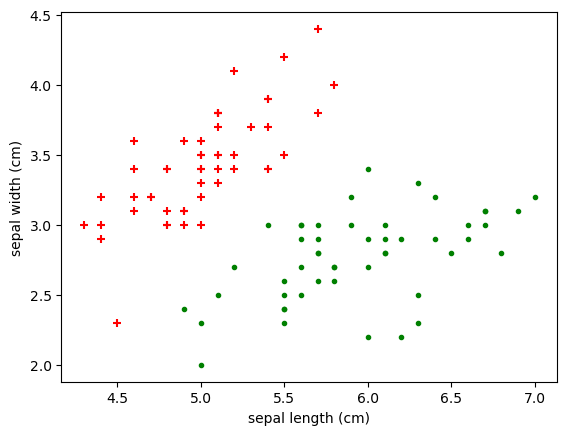

In [22]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='red', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', marker='.')

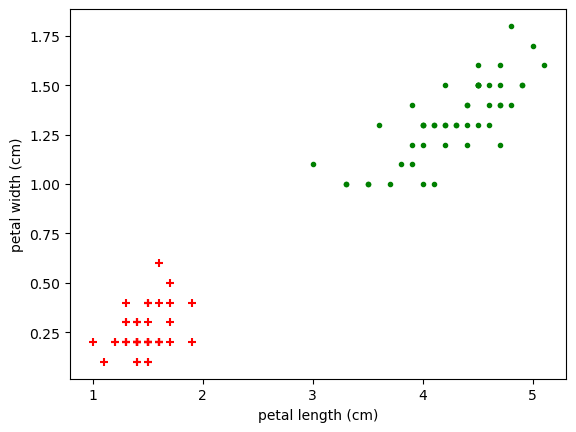

In [23]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', marker='.')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop(['target' , 'flower_names'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
y = df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [29]:
from sklearn.svm import SVC
model = SVC()

In [30]:
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [31]:
model.predict(X_test)

array([2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0,
       0])

In [32]:
model.score(X_test, y_test)

0.9777777777777777